<a href="https://colab.research.google.com/github/Diya910/git_test/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle competitions download -c cifar-10

100% 714M/715M [00:10<00:00, 124MB/s]
100% 715M/715M [00:10<00:00, 69.3MB/s]


In [3]:
!ls

sample_data


In [12]:
#extracting the compressed Dataset
from zipfile import ZipFile
file_name = "/content/cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [5]:
!ls

sample_data


In [6]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 52.4 MB/s eta 0:00:00


In [13]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [14]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [15]:
filesname = os.listdir('/content/train')

In [16]:
type(filesname)

list

In [17]:
len(filesname)

50000

In [ ]:
print(filesname[0:5])
print(filesname[-5:])

['19476.png', '38875.png', '14991.png', '18403.png', '33309.png']
['27153.png', '22462.png', '20992.png', '17197.png', '44649.png']


In [18]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [19]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [20]:
labels = [labels_dictionary[id] for id in labels_df['label']]

In [21]:
print(labels[0:5])

[6, 9, 9, 4, 1]


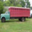

In [21]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(os.path.join('/content/train', filesname[0]))
cv2_imshow(img)

In [22]:
id_list = list(labels_df['id'])
print(id_list[0:5])

[1, 2, 3, 4, 5]


In [23]:
# Convert images to numpy arrays
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(os.path.join(train_data_folder, str(id)+ '.png'))
  image = np.array(image)
  data.append(image)

In [28]:
type(data)

list

In [29]:
type(data[0])

numpy.ndarray

In [31]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
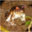

In [32]:
data[0]

In [24]:
from re import X
# convert images and labels to numpy arrays

X = np.array(data)
y = np.array(labels)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [27]:
# Building the Neural Network
from tensorflow import keras

In [28]:
num_of_classes = 10
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
]
)

In [29]:
# Compiling and Optimizing model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9979 - accuracy: 0.2591 - val_loss: 1.9853 - val_accuracy: 0.2645
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8741 - accuracy: 0.3179 - val_loss: 1.8634 - val_accuracy: 0.3282
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8328 - accuracy: 0.3347 - val_loss: 1.8011 - val_accuracy: 0.3467
Epoch 4/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8040 - accuracy: 0.3483 - val_loss: 1.7999 - val_accuracy: 0.3498
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7824 - accuracy: 0.3550 - val_loss: 1.7845 - val_accuracy: 0.3548
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7724 - accuracy: 0.3630 - val_loss: 1.7795 - val_accuracy: 0.3602
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7624 - accuracy: 0.3661 - val_loss: 1.7614 - val_accuracy:

In [31]:
#ResNet50
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import optimizers

In [32]:
convolutional_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

94765736/94765736 [==============================] - 0s 0us/step


In [33]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [34]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

In [ ]:
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train acc')
plt.plot(h.history['val_acc'], label='validation acc')
plt.legend()
plt.show()
